# House Price Prediction and Optimisation 


Data source - https://www.kaggle.com/competitions/home-data-for-ml-course/data

## Relevant libraries 

In [1]:
# Analysis
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')


# Models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore') #ignore warnings

%matplotlib inline

In [2]:
# Path of the file to read
iowa_file_path = r'C:\Users\bunmi\PycharmProjects\machine learning\machine_learning_UCD\week-13\data\train.csv'

home_data = pd.read_csv(iowa_file_path)


In [3]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# print the list of columns in the dataset to find the name of the prediction target
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Target variable 

Select the target variable, which corresponds to the sales price. Save this to a new variable called `y`. 

In [5]:
y = home_data['SalePrice']

In [6]:
# Getting Description
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
average_sale_price_iowa = round(y.mean())

In [8]:
"With an average price of USD " + str(average_sale_price_iowa) + " I should probably relocate to Iowa"

'With an average price of USD 180921 I should probably relocate to Iowa'

# Independent Variables


Now you will create a DataFrame called `X` holding the predictive features:
 - LotArea - *Lot size in square feet*
 - YearBuilt - *Original construction date*
 - 1stFlrSF - *First Floor square feet*
 - 2ndFlrSF - *Second floor square feet*
 - FullBath - *Full bathrooms above grade*
 - BedroomAbvGr - *Number of bedrooms above grade*
 - TotRmsAbvGrd - *Total rooms above grade (does not include bathrooms)* 


In [9]:
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',  'FullBath' , 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]


## Review Data

In [10]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


## Split into validation and training data 

In [11]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=1)

Here, Dataset is broken into two parts in ratio of 75:25. It means 75% data will used for model training and 25% for model testing.

## Specify and Fit Model
Create a `DecisionTreeRegressor` and save it iowa_model. 

 - We'll start with a model called the `Decision Tree`. 
 - There are fancier models that give more accurate predictions. 
 - But decision trees are easy to understand, and they are the basic building block for some of the best models in data science.

The decision tree on the above probably makes more sense, because it captures the reality that **houses with more bedrooms tend to sell at higher prices than houses with fewer bedrooms**. 

The biggest shortcoming of this model is that it doesn't capture most factors affecting home price, like **number of bathrooms**, **lot size**, **location**, etc.

### "Deeper" Tree 

- You can capture more factors using a tree that has more "splits." 
- These are called "deeper" trees. 
- A decision tree that also considers the total size of each house's lot might look like this:

Image Reference - https://www.kaggle.com/code/dansbecker/underfitting-and-overfitting 

- Every time you ask a question you’re adding a **node** to the tree. And the first node is called the **root node**.
- The result of asking a question splits the dataset based on the value of a feature, and creates new nodes.
- If you decide to stop the process after a split, the last nodes created are called **leaf nodes**.

 - You predict the price of any house by tracing through the decision tree, always picking the path corresponding to that house's characteristics. 
 - The predicted price for the house is at the **bottom of the tree**.
 - The point at the bottom where we make a prediction is called a **leaf**.



In [12]:
# from _ import _
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=1, max_depth =3)
# max_depth =3 (demo)
# Fit iowa_model with the training data.
iowa_model.fit(train_X,train_y)


DecisionTreeRegressor(max_depth=3, random_state=1)

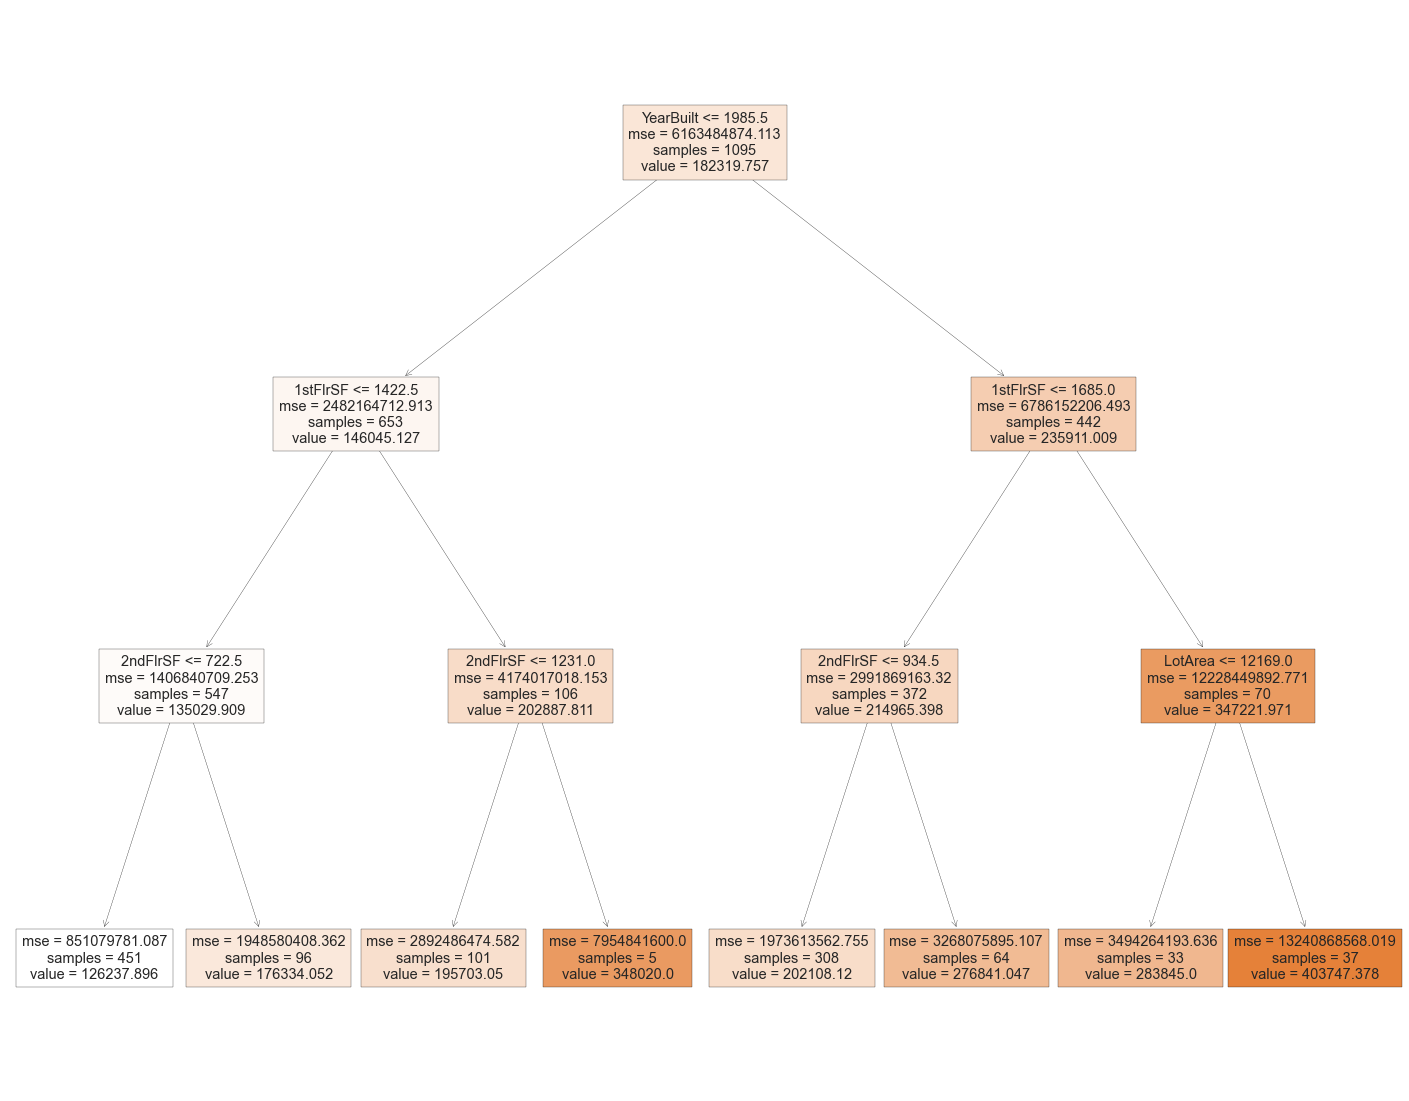

In [13]:
plt.figure(figsize=(25,20))
tree.plot_tree(iowa_model, feature_names=feature_names, filled=True);

## Make Predictions with Validation data

In [14]:
val_predictions  = iowa_model.predict(val_X)

In [15]:
# print the top few validation predictions
print(val_predictions[0:5])
# print the top few actual prices from validation data
print(val_y.head())

[202108.12012987 126237.89578714 126237.89578714 126237.89578714
 126237.89578714]
258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64


## How accurate is the model - Model Validation

In [16]:
comparison_dict = {"actual":val_y.head(), "prediction":val_predictions[0:5]}
comparison_df = pd.DataFrame(comparison_dict)
comparison_df

,actual,prediction
258,231500,202108.120130
267,179500,126237.895787
288,122000,126237.895787
649,84500,126237.895787
1233,142000,126237.895787


## Mean Absolute Error

There are many metrics for summarizing model quality, but we'll start with one called **Mean Absolute Error (also called MAE)**. 

Let's break down this metric starting with the last word, error.

The prediction error for each house is:

- Error = Actual values − Predicted values

### Example 

So, if a house cost **USD 150,000** and you predicted it would cost **USD 100,000** the error is **USD 50,000**.

With the MAE metric, we take the **absolute** value of each error. This converts each error to a positive number. 

We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as: 
 - On average, our predictions are off by about X.

In [17]:
comparison_df["error"] = abs(comparison_df["actual"] - comparison_df["prediction"] ) 

In [18]:
comparison_df

,actual,prediction,error
258,231500,202108.120130,29391.879870
267,179500,126237.895787,53262.104213
288,122000,126237.895787,4237.895787
649,84500,126237.895787,41737.895787
1233,142000,126237.895787,15762.104213


In [19]:
comparison_df["error"].mean()

28878.375974025974

In [20]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(val_y.head(),val_predictions[0:5]) #for the top 5 outcomes

28878.375974025974

It's natural to ask **how accurate the model's predictions will be and how you can improve that**. 

In [21]:
mean_absolute_error(val_predictions, val_y)

34490.68211317258

**Is that MAE good?**

There isn't a general rule for what values are good that applies across applications. But you'll see how to use (and improve) this number in the next step.

## Optimisation

There are many ways to improve this model, such as:
 - Experimenting to find better features
 - Hyper-parameter optimisation
 - Trying different model types


 - The most important options determine the tree's depth.

 - A tree's depth is a measure of how many splits it makes before coming to a prediction. 

 - This is a relatively **shallow tree**

Image Reference - https://www.kaggle.com/code/dansbecker/underfitting-and-overfitting 

### Overfitting and Underfitting 

- As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses.
- Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

 - This is a phenomenon called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data. 

 - On the Other side, if we make our tree very **shallow**, it doesn't divide up the houses into very distinct groups.

 - When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.
 
 - We dont want it to memorise every data point, we want a sweet spot

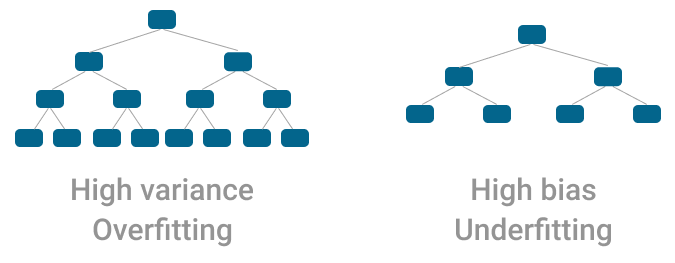

- For accuracy, we want to find the sweet spot between **underfitting** and **overfitting**. 

- Visually, we want the low point of the (red) validation curve in the figure below.

- Left and right side of the curve | See Both Axes

- **Overfitting**: capturing spurious patterns (e.g. Door Colour) that won't recur in the future, leading to less accurate predictions
- **Underfitting**: failing to capture relevant patterns, again leading to less accurate predictions.

Image Reference - https://www.kaggle.com/code/dansbecker/underfitting-and-overfitting 

- There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. 

- But the **max_leaf_nodes** argument provides a very sensible way to control overfitting vs underfitting. 

- The more **leaves** we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

In [22]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    """
    Function to get the MAE
    """
    model = DecisionTreeRegressor(max_depth=candidate_max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## Hyperparameter Tuning

Hyperparameter tuning (or hyperparameter optimization) is the process of determining the right combination of hyperparameters that maximizes the model performance. It works by running multiple trials in a single training process.

- Hyperparameters of Decision Trees Explained with Visualizations - https://towardsdatascience.com/hyperparameters-of-decision-trees-explained-with-visualizations-1a6ef2f67edf 

- sklearn.tree.DecisionTreeRegressor - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [23]:
#candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500, 1000]
#candidate_max_leaf_nodes = [5,10,15,20,25]
candidate_max_depths = range(5,25,1)
# Let's find the ideal tree size from candidate_max_leaf_nodes

for candidate_max_depth in candidate_max_depths:
        my_mae = get_mae(candidate_max_depth, train_X, val_X, train_y, val_y)
        print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(candidate_max_depth, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  28504
Max leaf nodes: 6  		 Mean Absolute Error:  28300
Max leaf nodes: 7  		 Mean Absolute Error:  26837
Max leaf nodes: 8  		 Mean Absolute Error:  26605
Max leaf nodes: 9  		 Mean Absolute Error:  27283
Max leaf nodes: 10  		 Mean Absolute Error:  27077
Max leaf nodes: 11  		 Mean Absolute Error:  27846
Max leaf nodes: 12  		 Mean Absolute Error:  28239
Max leaf nodes: 13  		 Mean Absolute Error:  28395
Max leaf nodes: 14  		 Mean Absolute Error:  28979
Max leaf nodes: 15  		 Mean Absolute Error:  29474
Max leaf nodes: 16  		 Mean Absolute Error:  28768
Max leaf nodes: 17  		 Mean Absolute Error:  29282
Max leaf nodes: 18  		 Mean Absolute Error:  29048
Max leaf nodes: 19  		 Mean Absolute Error:  28991
Max leaf nodes: 20  		 Mean Absolute Error:  29111
Max leaf nodes: 21  		 Mean Absolute Error:  28988
Max leaf nodes: 22  		 Mean Absolute Error:  29790
Max leaf nodes: 23  		 Mean Absolute Error:  29457
Max leaf nodes: 24  		 Mean Absolute

In [24]:
#specify the model. #For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model_2 = DecisionTreeRegressor(random_state=1, max_depth=8)

# Fit iowa_model with the training data.
iowa_model_2.fit(train_X,train_y)

#Predict 
val_predictions_2  = iowa_model_2.predict(val_X)

# Comparison
comparison_dict_2 = {"actual":round(val_y.head()), "prediction":val_predictions_2[0:5]}
comparison_df_2 = pd.DataFrame(comparison_dict_2)
comparison_df_2["prediction"] = round(comparison_df_2["prediction"])
comparison_df_2["diff"] = round(abs(comparison_df_2["actual"] - comparison_df_2["prediction"]))  
comparison_df_2


,actual,prediction,diff
258,231500,181225.0,50275.0
267,179500,130648.0,48852.0
288,122000,122142.0,142.0
649,84500,82062.0,2438.0
1233,142000,148515.0,6515.0


In [25]:
comparison_df_2["diff"].mean()

21644.4

In [26]:
# Make validation predictions and calculate mean absolute error
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model = iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes:", round(val_mae))

# Using best value for max_leaf_nodes
iowa_model_2 = DecisionTreeRegressor(max_depth=8, random_state=1)
iowa_model_2 = iowa_model_2.fit(train_X, train_y)
val_predictions_2 = iowa_model_2.predict(val_X)
val_mae = mean_absolute_error(val_predictions_2, val_y)
print("Validation MAE for best value of max_leaf_nodes:",round(val_mae))


Validation MAE when not specifying max_leaf_nodes: 29653
Validation MAE for best value of max_leaf_nodes: 26376


# Let's try a different model - Random Forest

In algorithms that combine multiple trees and control for bias or variance, like **Random Forests**, the model has a much better performance when compared to a single decision tree.

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
pred = rf_model.predict(val_X)

rf_val_mae = mean_absolute_error(val_y, pred)

print("Validation MAE for Random Forest Model:", round(rf_val_mae))

Validation MAE for Random Forest Model: 21857


In [28]:
# Make validation predictions and calculate mean absolute error
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model = iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes:", round(val_mae))

# Using best value for max_leaf_nodes
iowa_model_2 = DecisionTreeRegressor(max_depth=8, random_state=1)
iowa_model_2 = iowa_model_2.fit(train_X, train_y)
val_predictions_2 = iowa_model_2.predict(val_X)
val_mae = mean_absolute_error(val_predictions_2, val_y)
print("Validation MAE for best value of max_leaf_nodes:",round(val_mae))


#Using Random forest
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X,train_y)
pred = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y, pred)
print("Validation MAE for Random Forest Model:", round(rf_val_mae))

Validation MAE when not specifying max_leaf_nodes: 29653
Validation MAE for best value of max_leaf_nodes: 26376
Validation MAE for Random Forest Model: 21857


In [29]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [30]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [31]:
ade_house = { "LotArea": [5000],
             "YearBuilt": [2010],
             "1stFlrSF": [2000],
             "2ndFlrSF":[0],
             "FullBath": [2],
             "BedroomAbvGr": [3],
             "TotRmsAbvGrd": [4] 
            }

ade_house = pd.DataFrame(ade_house) 
ade_house 

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,5000,2010,2000,0,2,3,4


In [32]:
ade_house_pred = rf_model.predict(ade_house)
ade_house_pred

array([358563.52])

# References

Intro to Machine Learning - https://www.kaggle.com/learn/intro-to-machine-learning

Predicting House Prices with Machine Learning - https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=dd64d6f6af0f41ac3b3aefae503b1d8263c7fbf6&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f64696769706f6469756d2f5265616c2d4573746174652d416e616c797369732d616e642d50726564696374696f6e2f646436346436663661663066343161633362336165666165353033623164383236336337666266362f486f7573655072696365446174616e616c7973697325323670726564696374696f6e2e6970796e62&logged_in=false&nwo=digipodium%2FReal-Estate-Analysis-and-Prediction&path=HousePriceDatanalysis%26prediction.ipynb&platform=android&repository_id=264623977&repository_type=Repository&version=99


**Further exploration**
- House Prices: 1st Approach to Data Science Process - https://www.kaggle.com/code/cheesu/house-prices-1st-approach-to-data-science-process

- Data Science Workflow TOP 2% (with Tuning) - https://www.kaggle.com/code/angqx95/data-science-workflow-top-2-with-tuning 
- House Price Calculation methods for beginners - https://www.kaggle.com/code/bsivavenu/house-price-calculation-methods-for-beginners 
- Boston house price prediction - https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction/notebook 
- wwcodemanila - https://github.com/wwcodemanila/WWCodeManila-ML.AI/blob/master/tutorials/Intro-to-Machine-Learning.ipynb 
- Tuning Hyperparameters of Machine Learning Model - https://github.com/dataprofessor/code/blob/master/python/hyperparameter_tuning.ipynb
--

- Decision Tree Classifier explained in real-life: picking a vacation destination - https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575 
- https://towardsdatascience.com/how-to-build-a-machine-learning-model-439ab8fb3fb1
- Random Forests Algorithm explained with a real-life example and some Python code - https://towardsdatascience.com/random-forests-algorithm-explained-with-a-real-life-example-and-some-python-code-affbfa5a942c
- Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python - https://mljar.com/blog/visualize-decision-tree/ 
- Predicting House Prices with Machine Learning - https://towardsdatascience.com/predicting-house-prices-with-machine-learning-62d5bcd0d68f
- Hyperparameters of Decision Trees Explained with Visualizations -https://towardsdatascience.com/hyperparameters-of-decision-trees-explained-with-visualizations-1a6ef2f67edf
- Decision Trees - Trees, Forests & Ensembles - https://amueller.github.io/aml/02-supervised-learning/08-decision-trees.html
